<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br><br><br>

# Listed Volatility and Variance Derivatives

**Dr. Yves J. Hilpisch &mdash; Wiley Finance (2016)**

<img src="http://hilpisch.com/images/lvvd_cover.png" alt="Derivatives Analytics with Python" width="30%" align="left" border="0">

# Data Analysis and Strategies

## Introduction

## Retrieving Base Data

In [1]:
import numpy as np
import pandas as pd
path = 'data/'  # path to data folder

### EURO STOXX 50 Data 

In [2]:
source = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/'

In [3]:
es_url = source + 'hbrbcpe.txt'

In [4]:
import requests
print requests.get(es_url).text[:1000].replace(' ', '')

PriceIndices-EUROCurrency
Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad
;Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic
;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF
31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56
01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56
02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81
05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82
06.01.1987;775.92;902.32;83.28;99.19;98.83;69.50;652.49;66.06
07.01.1987;781.21;899.15;83.78;98.96;98.62;70.59;651.97;66.20
08.01.1987;777.62;887.37;83.52;97.87;97.68;71.01;645.57;65.62
09.01.1987;769.80;868.31;83.03;96.31;96.22;71.40;638.03;65.14


In [5]:
## new column names (without white space)
## adding column 'DEL' -- to be deleted after parsing
columns = ['Date', 'SX5P', 'SX5E', 'SXXP', 'SXXE',
           'SXXF', 'SXXA', 'DK5F', 'DKXF', 'DEL']

In [6]:
es = pd.read_csv(es_url,  # url/filename
                 index_col=0,  # index column (dates)
                 parse_dates=True,  # parse date information
                 dayfirst=True,  # day before month
                 header=None,  # ignore header information
                 skiprows=4,  # ignore first 4 rows
                 names=columns,  # use custom column names
                 sep=';')  # separator character

In [7]:
del es['DEL']  # deletes helper column

In [8]:
es = es[es.index <= '2015-12-31']  # data until the end of 2015
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
Date,,,,,,,,
2015-12-24,3108.11,3284.47,366.28,346.05,433.43,375.39,9931.72,614.38
2015-12-28,3093.61,3256.49,364.49,343.54,431.26,374.32,9873.94,611.58
2015-12-29,3139.28,3314.28,369.68,349.29,438.43,378.86,10023.66,620.66
2015-12-30,3118.07,3287.98,367.70,347.02,435.82,377.20,9956.22,617.48
2015-12-31,3100.26,3267.52,365.81,345.16,433.81,375.34,9978.59,618.73


In [9]:
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7476 entries, 1986-12-31 to 2015-12-31
Data columns (total 8 columns):
SX5P    7476 non-null float64
SX5E    7476 non-null float64
SXXP    7476 non-null float64
SXXE    7476 non-null float64
SXXF    7476 non-null float64
SXXA    7476 non-null float64
DK5F    7476 non-null float64
DKXF    7476 non-null float64
dtypes: float64(8)
memory usage: 525.7 KB


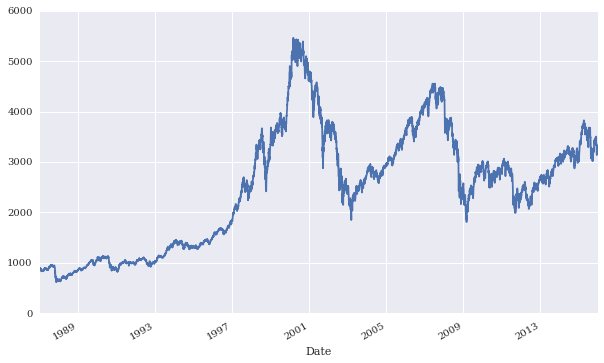

In [10]:
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'  # set serif font
%matplotlib inline
es['SX5E'].plot(grid=True, figsize=(10, 6));

### VSTOXX Data

In [11]:
vs_url = source + 'h_vstoxx.txt'

In [12]:
print(requests.get(vs_url).text[160:1040])

Date,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
04.01.1999,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209
05.01.1999,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532
06.01.1999,25.1670,25.4107,25.1351,32.2186,32.6459,31.9673,32.9260,33.2871,26.0107
07.01.1999,32.5205,35.4410,32.2004,36.1265,34.5150,33.1095,33.2843,33.7269,26.2205
08.01.1999,33.2296,35.8846,33.0020,36.0813,36.3964,33.4658,33.4837,33.9227,26.3672
11.01.1999,36.8411,46.9742,36.4643,39.9139,38.0755,34.6165,34.4576,34.6615,26.6732
12.01.1999,37.5664,48.6277,37.2998,40.5525,38.7981,35.0575,37.5290,36.5965,28.0273
13.01.1999,39.7373,55.2934,39.5218,43.0083,40.1301,36.0443,38.3889,37.2219,28.1443
14.01.1999,39.1373,NA,39.9544,41.7597,40.5913,36.3330,38.6781,37.4249,28.1515
15.01.1999,38.6741,NA,39.0602,40.1232,39.2451,35.9745,37.7796,36.7660,28.0793


In [13]:
vs = pd.read_csv(vs_url,  # url/filename
                 index_col=0,  # index column (dates)
                 parse_dates=True,  # parse date information
                 dayfirst=True, # day before month
                 header=2)  # header/column names

In [14]:
vs = vs[vs.index <= '2015-12-31']
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4327 entries, 1999-01-04 to 2015-12-30
Data columns (total 9 columns):
V2TX    4327 non-null float64
V6I1    3878 non-null float64
V6I2    4327 non-null float64
V6I3    4267 non-null float64
V6I4    4327 non-null float64
V6I5    4327 non-null float64
V6I6    4310 non-null float64
V6I7    4327 non-null float64
V6I8    4313 non-null float64
dtypes: float64(9)
memory usage: 338.0 KB


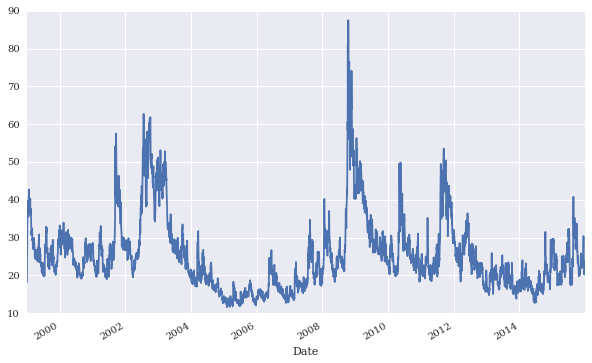

In [15]:
vs['V2TX'].plot(grid=True, figsize=(10, 6));

### Combining the Data Sets

In [16]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX':
            es['SX5E'][es.index > dt.datetime(1999, 1, 1)],
                   'VSTOXX': 
            vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]})
data = data.dropna()  # deletes those rows with NaN values

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4326 entries, 1999-01-04 to 2015-12-30
Data columns (total 2 columns):
EUROSTOXX    4326 non-null float64
VSTOXX       4326 non-null float64
dtypes: float64(2)
memory usage: 101.4 KB


In [18]:
es.iloc[-10:]

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
Date,,,,,,,,
2015-12-17,3095.83,3306.47,364.90,347.46,433.96,371.43,9857.04,610.15
2015-12-18,3065.07,3260.72,361.23,343.23,429.32,368.38,9722.97,602.49
2015-12-21,3022.51,3213.01,357.15,338.55,424.21,364.99,9707.52,601.18
2015-12-22,3019.26,3214.32,356.87,338.77,423.95,364.23,9691.72,599.53
2015-12-23,3109.23,3286.68,366.39,346.14,433.58,375.53,9927.33,614.12
2015-12-24,3108.11,3284.47,366.28,346.05,433.43,375.39,9931.72,614.38
2015-12-28,3093.61,3256.49,364.49,343.54,431.26,374.32,9873.94,611.58
2015-12-29,3139.28,3314.28,369.68,349.29,438.43,378.86,10023.66,620.66
2015-12-30,3118.07,3287.98,367.70,347.02,435.82,377.20,9956.22,617.48


In [19]:
np.round(vs, 2).iloc[-10:]

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
2015-12-15,27.46,41.71,27.41,26.63,26.72,26.66,26.41,26.36,27.44
2015-12-16,25.44,49.12,25.44,25.21,25.34,25.57,25.54,25.77,26.65
2015-12-17,22.58,NaN,22.50,23.47,23.94,24.80,25.01,25.34,26.24
2015-12-18,23.90,NaN,23.76,24.78,25.06,25.80,25.75,25.91,26.54
2015-12-21,23.88,23.56,24.62,24.99,25.80,25.87,26.04,26.64,NaN
2015-12-22,22.54,21.92,23.64,24.14,25.25,25.31,25.64,26.04,26.05
2015-12-23,20.25,19.42,21.45,22.24,24.01,24.46,24.84,25.65,25.44
2015-12-28,22.45,21.43,23.08,23.65,24.70,24.91,25.25,25.46,25.34
2015-12-29,21.61,20.56,22.14,22.87,24.31,24.59,25.06,25.65,25.26


In [20]:
data.iloc[-10:]

,EUROSTOXX,VSTOXX
Date,,
2015-12-15,3241.51,27.4591
2015-12-16,3246.78,25.4362
2015-12-17,3306.47,22.5761
2015-12-18,3260.72,23.8989
2015-12-21,3213.01,23.8836
2015-12-22,3214.32,22.5361
2015-12-23,3286.68,20.2504
2015-12-28,3256.49,22.4544
2015-12-29,3314.28,21.6067


### Saving the Data

In [21]:
h5 = pd.HDFStore(path + 'es_vs_data.h5', 'w')
h5['es'] = es
h5['vs'] = vs
h5['data'] = data

In [22]:
h5

<class 'pandas.io.pytables.HDFStore'>
File path: data/es_vs_data.h5
/data            frame        (shape->[4326,2])
/es              frame        (shape->[7476,8])
/vs              frame        (shape->[4327,9])

In [23]:
h5.close()

## Basic Data Analysis

In [24]:
h5 = pd.HDFStore(path  + 'es_vs_data.h5', 'r')

In [25]:
h5

<class 'pandas.io.pytables.HDFStore'>
File path: data/es_vs_data.h5
/data            frame        (shape->[4326,2])
/es              frame        (shape->[7476,8])
/vs              frame        (shape->[4327,9])

In [26]:
es = h5['es']
vs = h5['vs']
data = h5['data']
h5.close()

In [27]:
data.describe()

,EUROSTOXX,VSTOXX
count,4326.000000,4326.000000
mean,3265.935767,25.209891
std,770.513845,9.670981
min,1809.980000,11.596600
25%,2692.385000,18.670200
50%,3089.965000,23.162700
75%,3725.357500,28.310725
max,5464.430000,87.512700


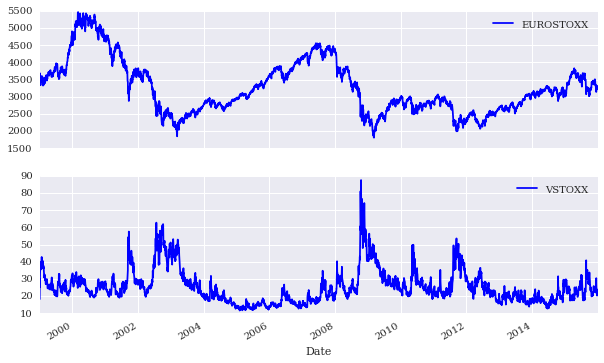

In [28]:
data.plot(subplots=True,  # generate sub-plots per column
              figsize=(10, 6),  # sizing of the figure
              color='blue');  # color to plot the data

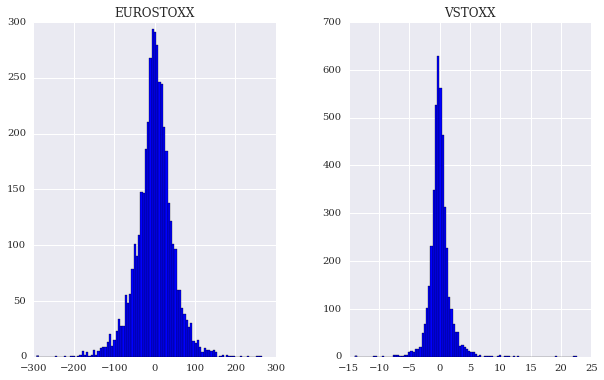

In [29]:
data.diff().hist(figsize=(10, 6),  # figure sizing
                 color='blue',  # color for the plotted data
                 bins=100);  # number of bins to be used

In [30]:
data.pct_change().ix[-10:]

,EUROSTOXX,VSTOXX
Date,,
2015-12-15,0.032578,-0.097067
2015-12-16,0.001626,-0.073670
2015-12-17,0.018384,-0.112442
2015-12-18,-0.013837,0.058593
2015-12-21,-0.014632,-0.000640
2015-12-22,0.000408,-0.056419
2015-12-23,0.022512,-0.101424
2015-12-28,-0.009186,0.108837
2015-12-29,0.017746,-0.037752


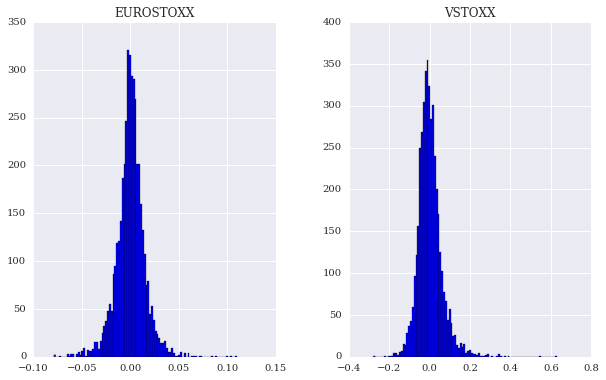

In [31]:
data.pct_change().hist(figsize=(10, 6),
                       color='blue', 
                       bins=100);

In [32]:
import numpy as np
## fully vectorized calculation of log returns
log_rets = np.log(data / data.shift(1))
log_rets.ix[:10]

,EUROSTOXX,VSTOXX
Date,,
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570
1999-01-11,-0.019593,0.103173
1999-01-12,-0.012490,0.019496
1999-01-13,-0.048535,0.056180
1999-01-14,0.008648,-0.015214


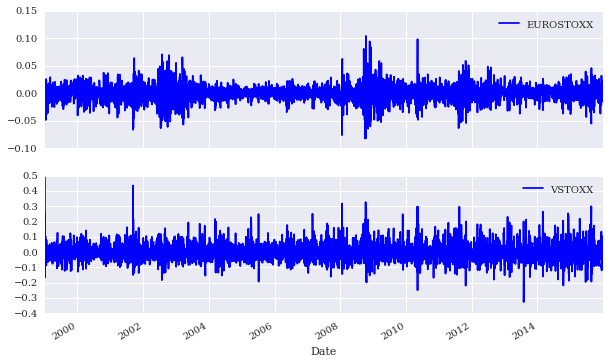

In [33]:
log_rets.plot(subplots=True,
              figsize=(10, 6),
              color='blue',
              grid=True);

## Correlation Analysis

In [34]:
log_rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.735032
VSTOXX,-0.735032,1.000000


In [35]:
log_rets['EUROSTOXX'].corr(log_rets['VSTOXX'])

-0.73503163966378193

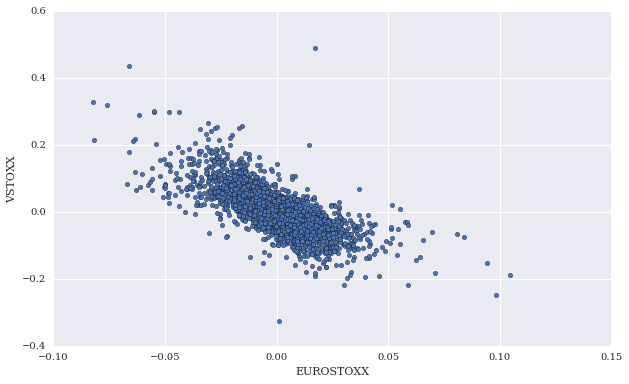

In [36]:
## plot log returns as scatter plot
log_rets.plot(x='EUROSTOXX', y='VSTOXX',
              kind='scatter', figsize=(10, 6));

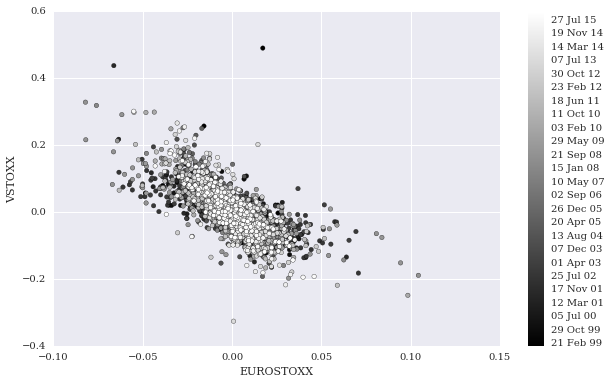

In [37]:
log_rets = log_rets.dropna() # delete NaN values
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.ioff()  # turn off interactive mode
plt.set_cmap(mpl.cm.gray);  # set color map
mpl_dates = mpl.dates.date2num(log_rets.index.to_pydatetime())  # conversion
plt.figure(figsize=(10, 6));
plt.scatter(log_rets['EUROSTOXX'], log_rets['VSTOXX'],
            c=mpl_dates, marker='o');  # the actual plot
plt.xlabel('EUROSTOXX');
plt.ylabel('VSTOXX');
# @savefig log_rets_scatter_2.pdf
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
        format=mpl.dates.DateFormatter('%d %b %y'));  # adding bar

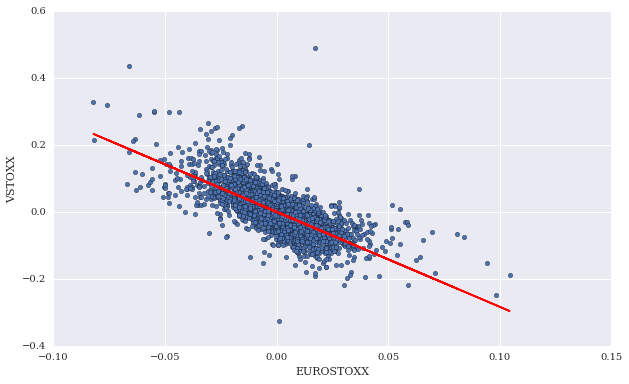

In [38]:
## conduct linear regression
p = np.polyfit(log_rets['EUROSTOXX'].values,
               log_rets['VSTOXX'].values,
               deg=1)  # the regression
log_rets.plot(x='EUROSTOXX', y='VSTOXX',
              kind='scatter', figsize=(10, 6));  # the actual plotting
## plot the regression line
plt.plot(log_rets['EUROSTOXX'], np.polyval(p, log_rets['EUROSTOXX']),
         'r');  # adding the regression line

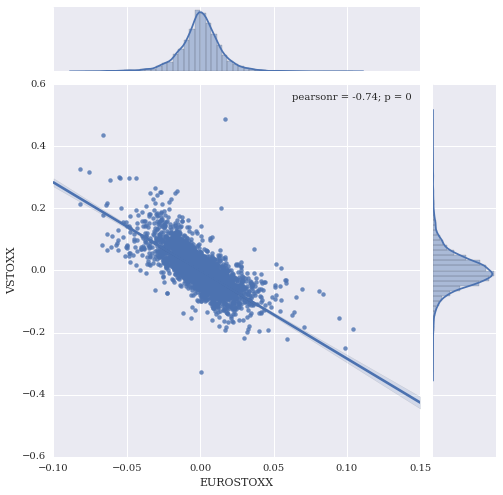

In [39]:
sns.jointplot(x=log_rets['EUROSTOXX'], y=log_rets['VSTOXX'], 
              kind='reg', size=7);

In [40]:
data['CORR'] = log_rets['EUROSTOXX'].rolling(
                window=252).corr(log_rets['VSTOXX'])

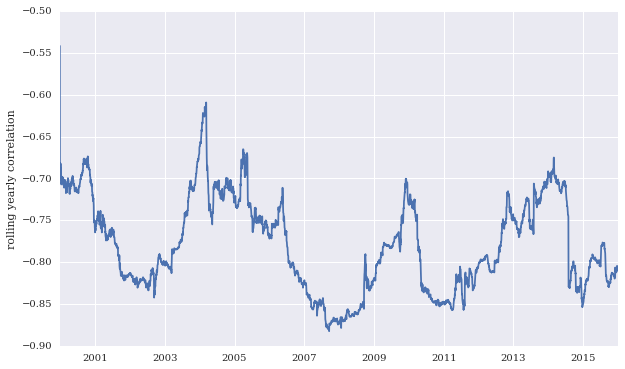

In [41]:
to_plot = data.dropna()  # drop NaN values
plt.figure(figsize=(10, 6));
plt.plot(data.index, data.CORR);
# @savefig rolling_corr.pdf
plt.ylabel('rolling yearly correlation');

## Constant Proportion Investment Strategies

In [42]:
del data['CORR']  # delete correlation data
data = data.dropna()  # drop NaN values
data = data / data.iloc[0] * 100  # normalization

In [43]:
data.head()

,EUROSTOXX,VSTOXX
Date,,
1999-01-04,100.000000,100.000000
1999-01-05,101.737744,163.108887
1999-01-06,104.015128,138.255152
1999-01-07,102.392538,178.651673
1999-01-08,102.073608,182.547121


In [44]:
invest = 100  # initial investment
cratio = 0.3  # VSTOXX ratio in the beginning
## number of EURO STOXX (fictional) securities
data['Equity'] = (1 - cratio) * invest / data['EUROSTOXX'][0]
## number of VSTOXX (fictional) securities
data['Volatility'] = cratio * invest / data['VSTOXX'][0]

In [45]:
data['Passive'] = (data['Equity'] * data['EUROSTOXX']
                + data['Volatility'] * data['VSTOXX'])

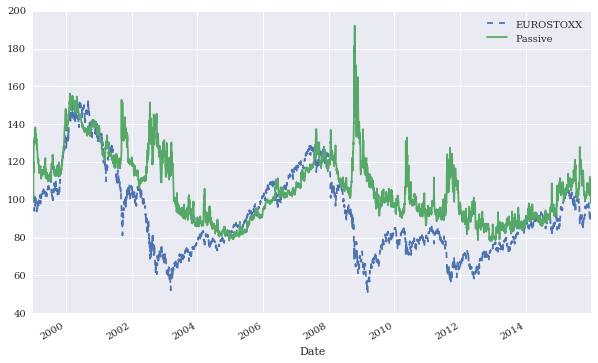

In [46]:
data[['EUROSTOXX', 'Passive']].plot(figsize=(10, 6), style=['--', '-']);

In [47]:
for i in range(1, len(data)):  # daily re-balancing
    evalue = data['Equity'][i - 1] * data['EUROSTOXX'][i]
    vvalue = data['Volatility'][i - 1] * data['VSTOXX'][i]
    tvalue = evalue + vvalue  # total wealth  
    data['Equity'][i] = (1 - cratio) * tvalue / data['EUROSTOXX'][i] 
    data['Volatility'][i] = cratio * tvalue / data['VSTOXX'][i] 

In [48]:
data['Active'] = (data['Equity'] * data['EUROSTOXX']
                + data['Volatility'] * data['VSTOXX'])
np.round(data.head(), 2)

,EUROSTOXX,VSTOXX,Equity,Volatility,Passive,Active
Date,,,,,,
1999-01-04,100.00,100.00,0.70,0.30,100.00,100.00
1999-01-05,101.74,163.11,0.83,0.22,120.15,120.15
1999-01-06,104.02,138.26,0.78,0.25,114.29,116.54
1999-01-07,102.39,178.65,0.86,0.21,125.27,125.48
1999-01-08,102.07,182.55,0.86,0.21,126.22,126.03


In [49]:
np.round(data.tail(), 2)

,EUROSTOXX,VSTOXX,Equity,Volatility,Passive,Active
Date,,,,,,
2015-12-22,90.72,123.80,7.22,2.27,100.65,936.01
2015-12-23,92.76,111.25,6.96,2.49,98.31,922.28
2015-12-28,91.91,123.35,7.21,2.30,101.34,946.46
2015-12-29,93.54,118.70,7.09,2.39,101.09,947.50
2015-12-30,92.80,121.82,7.16,2.34,101.50,949.71


In [50]:
(data['Volatility'] * data['VSTOXX'] / data['Active'])[:5]

(data['Equity'] * data['EUROSTOXX'] / data['Active'])[:5]

Date
1999-01-04    0.7
1999-01-05    0.7
1999-01-06    0.7
1999-01-07    0.7
1999-01-08    0.7
dtype: float64

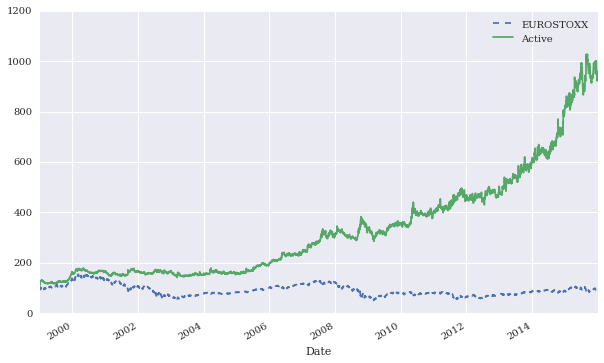

In [51]:
data[['EUROSTOXX', 'Active']].plot(figsize=(10, 6), style=['--', '-']);

In [52]:
## re-initialize DataFrame
data = data[['EUROSTOXX', 'VSTOXX']]

In [53]:
from copy import deepcopy
def vstoxx_strategy(cratio, start=data.index[0], end=data.index[-1]):
    base = deepcopy(data[(data.index >= start) & (data.index <= end)])
    invest = 100  # initial invest
    base['Equity'] = (1 - cratio) * invest / base['EUROSTOXX'][0]
    base['Volatility'] = cratio * invest / base['VSTOXX'][0]
    for i in range(1, len(base)):  # daily re-balancing
        evalue = base['Equity'][i - 1] * base['EUROSTOXX'][i]
        vvalue = base['Volatility'][i - 1] * base['VSTOXX'][i]
        tvalue = evalue + vvalue
        base['Equity'][i] = (1 - cratio) * tvalue / base['EUROSTOXX'][i]
        base['Volatility'][i] = cratio * tvalue / base['VSTOXX'][i]
    base['Active'] = (base['Equity'] * base['EUROSTOXX']
                + base['Volatility'] * base['VSTOXX'])  # wealth position
    print("A con. VSTOXX ratio of %.2f yields a net perform. of %6.1f%%.") \
            % (cratio, (base['Active'][-1] / base['Active'][0] - 1) * 100)

In [54]:
vstoxx_strategy(0.3)

A con. VSTOXX ratio of 0.30 yields a net perform. of  849.7%.


In [55]:
vstoxx_strategy(0.4)

A con. VSTOXX ratio of 0.40 yields a net perform. of 1231.9%.


In [56]:
for cratio in np.arange(0, 1.01, 0.1):
    vstoxx_strategy(cratio)

A con. VSTOXX ratio of 0.00 yields a net perform. of   -7.2%.
A con. VSTOXX ratio of 0.10 yields a net perform. of  151.5%.
A con. VSTOXX ratio of 0.20 yields a net perform. of  445.4%.
A con. VSTOXX ratio of 0.30 yields a net perform. of  849.7%.
A con. VSTOXX ratio of 0.40 yields a net perform. of 1231.9%.
A con. VSTOXX ratio of 0.50 yields a net perform. of 1408.7%.
A con. VSTOXX ratio of 0.60 yields a net perform. of 1283.2%.
A con. VSTOXX ratio of 0.70 yields a net perform. of  928.4%.
A con. VSTOXX ratio of 0.80 yields a net perform. of  521.0%.
A con. VSTOXX ratio of 0.90 yields a net perform. of  204.9%.
A con. VSTOXX ratio of 1.00 yields a net perform. of   21.8%.


In [57]:
for cratio in np.arange(0, 1.01, 0.1):
    vstoxx_strategy(cratio, start='2013-1-1', end='2015-12-31')

A con. VSTOXX ratio of 0.00 yields a net perform. of   21.3%.
A con. VSTOXX ratio of 0.10 yields a net perform. of   47.9%.
A con. VSTOXX ratio of 0.20 yields a net perform. of   72.4%.
A con. VSTOXX ratio of 0.30 yields a net perform. of   92.2%.
A con. VSTOXX ratio of 0.40 yields a net perform. of  105.0%.
A con. VSTOXX ratio of 0.50 yields a net perform. of  109.2%.
A con. VSTOXX ratio of 0.60 yields a net perform. of  104.3%.
A con. VSTOXX ratio of 0.70 yields a net perform. of   91.1%.
A con. VSTOXX ratio of 0.80 yields a net perform. of   71.2%.
A con. VSTOXX ratio of 0.90 yields a net perform. of   46.9%.
A con. VSTOXX ratio of 1.00 yields a net perform. of   20.8%.


## Conclusions

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>

**DX Analytics** |
<a href="http://dx-analytics.com">http://dx-analytics.com</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance Books** |
<a href="http://books.tpq.io" target="_blank">http://books.tpq.io</a>

**Python for Finance Training** |
<a href="http://training.tpq.io" target="_blank">http://training.tpq.io</a>